In [1]:
import xarray as xr
from pathlib import Path
import h5py

In [5]:
pip install pydsstools-X.x-cp39-cp39m-win_amd64.whl

ERROR: pydsstools-X.x-cp39-cp39m-win_amd64.whl is not a supported wheel on this platform.
Note: you may need to restart the kernel to use updated packages.


#### List all hdf files in the directory

In [2]:
files = [i for i in Path("../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/").iterdir() if i.suffix == ".hdf"]

#### Check if any of these files are not empty

In [3]:
for f in files:
    cond = len(list(xr.open_dataset(f).data_vars.values())) > 0
    if cond:
        print(f)

#### Try and open it (this produces an empty output)

In [5]:
# xr.open_dataset("../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/DissModel.p06.hdf", engine="h5netcdf")

#### Save some of the results to an array

In [180]:
filename = "../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/DissModel.p06.hdf"
times = []
with h5py.File(filename, "r") as f:
    arr = (f['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Time Date Stamp'])
    print(arr.shape)
    times.append(arr)

(4321,)


In [187]:
with h5py.File(filename, "r") as f:
    arr = (f['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas']['Catchment']['Water Surface'])
    print(arr.shape)

(4321, 272042)


In [189]:
# with h5py.File(filename, "r") as f:
#     print(dir(f))
#     #print(f.regionref.shape())
#     print(dir(f.ref))
#     print(f['coordinates'])

In [142]:
def unpack_dict(dicts, level=0, structure = []):
    indent = "-"*level
    for key, item in dicts.items():
        string = f"{indent} {key}"
        print(string)
        structure.append(string)
        if (type(item) == dict) or (type(item) == h5py._hl.group.Group):
            level += 1
            unpack_dict(item,level=level, structure=structure)
        elif type(item) == h5py._hl.dataset.Dataset:
            print(item.shape)
            
    return structure

with h5py.File(filename, "r") as f:
    structure = unpack_dict(f)

 Event Conditions
- Unsteady
-- Boundary Conditions
--- Normal Depths
---- 2D: Catchment BCLine: Catchment_BC
(1,)
--- Precipitation Hydrographs
----- 2D: Catchment
(361, 2)
-- Initial Conditions
 Geometry
-- 2D Flow Area Break Lines
--- Attributes
(16,)
--- Polyline Info
(16, 4)
--- Polyline Parts
(16, 2)
--- Polyline Points
(180, 2)
-- 2D Flow Areas
---- Attributes
(1,)
---- Catchment
----- Cells Center Coordinate
(272042, 2)
----- Cells Center Manning's n
(272042,)
----- Cells Face and Orientation Info
(272042, 2)
----- Cells Face and Orientation Values
(1086926, 2)
----- Cells FacePoint Indexes
(272042, 7)
----- Cells Minimum Elevation
(272042,)
----- Cells Surface Area
(272042,)
----- Cells Volume Elevation Info
(272042, 2)
----- Cells Volume Elevation Values
(4227306, 2)
----- FacePoints Cell Index Values
(1089266,)
----- FacePoints Cell Info
(273762, 2)
----- FacePoints Coordinate
(273762, 2)
----- FacePoints Face and Orientation Info
(273762, 2)
----- FacePoints Face and Orient

In [190]:
with h5py.File(filename, "r") as f:
    arr = f['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Summary Output']['2D Flow Areas']['Catchment']['Maximum Water Surface'][()]


In [194]:
arr.shape
272042/4320

62.972685185185185

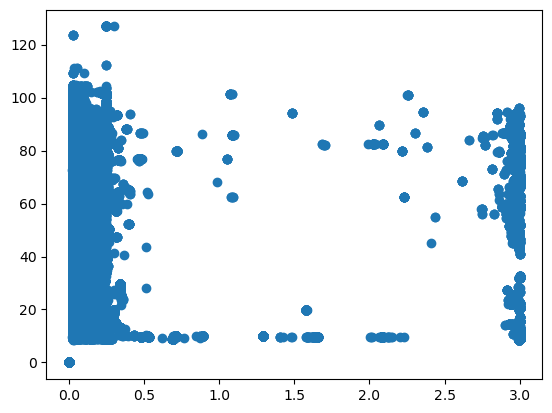

In [146]:
plt.scatter(arr[1], arr[0])

In [85]:
with open("structure.txt", "w") as f:
    for l in structure:
        f.write(f"{l}\n")

In [35]:
import h5py
filename = filename

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[3]
    print(a_group_key)

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['Event Conditions', 'Geometry', 'Plan Data', 'Results']>
Results
<class 'h5py._hl.group.Group'>


TypeError: Accessing a group is done with bytes or str, not <class 'tuple'>